## Import

In [132]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from scipy.optimize import curve_fit
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

## color and saving

In [162]:
color = "#9a3324"

cmap_color_end = "#00274C"
cmap_color_start = "#FFCB05"
cmap_name = "maize2blue"

folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig2_diffusion analysis/example_zoomed_in_tracks"
os.chdir(folder_save)

fname_save_prefix = "zoomed_in_RNA_track-constrained-1"
switch_read_from_file = True
switch_savefig = True

## Raw data from file

In [163]:
if switch_read_from_file:
    df_load = pd.read_csv(fname_save_prefix + "-data.csv")
    t = df_load[df_load["variable"] == "t_s"]["value"].to_numpy(dtype=float)
    x = df_load[df_load["variable"] == "x_nm"]["value"].to_numpy(dtype=float)
    y = df_load[df_load["variable"] == "y_nm"]["value"].to_numpy(dtype=float)
    MSD = df_load[df_load["variable"] == "MSD_um2"]["value"].to_numpy(dtype=float)
    tau = df_load[df_load["variable"] == "tau_s"]["value"].to_numpy(dtype=float)
    length = MSD.shape[0]
    half_length = round(length / 2)

## Filtering and find track

In [135]:
if not switch_read_from_file:
    df = pd.read_csv("SPT_results_AIO_concat-0Dex_noTR_0hr.csv")

In [136]:
if not switch_read_from_file:
    df.astype(
        {
            "N_steps": int,
            "mean_stepsize_nm": float,
            "max_d_anytwo_nm": float,
            "alpha": float,
            "linear_fit_log10D": float,
            "linear_fit_log10D": float,
            "linear_fit_R2": float,
        }
    )
    df_static = df[
        (df["mean_stepsize_nm"] < 30) & (df["N_steps"] > 50) & (df["linear_fit_R2"] < 0.5)
    ].sort_values(by="max_d_anytwo_nm", ascending=True)

    df_constrained = df[
        (df["max_d_anytwo_nm"] > 300)
        & (df["alpha"] < 0.5)
        & (df["N_steps"] > 50)
        & (df["linear_fit_R2"] < 0.7)
    ].sort_values(by="max_d_anytwo_nm", ascending=True)

    df_free = df[
        (df["max_d_anytwo_nm"] > 200)
        & (df["alpha"] > 0.95)
        & (df["N_steps"] > 8)
        & (df["linear_fit_R2"] > 0.99)
    ].sort_values(by="max_d_anytwo_nm", ascending=False)

    df_badfitting = df[
        (df["max_d_anytwo_nm"] > 300)
        & (df["alpha"] < 0.3)
        & (df["N_steps"] > 30)
        & (df["linear_fit_R2"] < 0.2)
    ].sort_values(by="max_d_anytwo_nm", ascending=True)

In [137]:
if not switch_read_from_file:
    idx = 0

In [138]:
if not switch_read_from_file:
    df_from = df_static
    nm_per_pxl = 117
    s_per_frame = 0.02

    x = np.fromstring(df_from.iloc[idx]["list_of_x"][1:-1], sep=", ")
    y = np.fromstring(df_from.iloc[idx]["list_of_y"][1:-1], sep=", ")
    t = np.fromstring(df_from.iloc[idx]["list_of_t"][1:-1], sep=", ")
    MSD = np.fromstring(df_from.iloc[idx]["list_of_MSD_um2"][1:-1], sep=", ")
    tau = np.fromstring(df_from.iloc[idx]["list_of_tau_s"][1:-1], sep=", ")
    print("filename", str(df_from.iloc[idx]["filename"]))
    print("mean_x_pxl", str(df_from.iloc[idx]["mean_x_pxl"]))
    print("mean_y_pxl", str(df_from.iloc[idx]["mean_y_pxl"]))
    print("N_steps", str(df_from.iloc[idx]["N_steps"]))
    print("max_d_anytwo_nm", str(df_from.iloc[idx]["max_d_anytwo_nm"]))
    print("alpha", str(df_from.iloc[idx]["alpha"]))
    print("log10D", str(df_from.iloc[idx]["linear_fit_log10D"]))
    print("R2", str(df_from.iloc[idx]["linear_fit_R2"]))
    x = (x - (x.min() + x.max()) / 2) * nm_per_pxl
    y = (y - (y.min() + y.max()) / 2) * nm_per_pxl
    t = (t - t[0]) * s_per_frame

    print("idx", idx)
    idx += 1

    plt.figure(figsize=(5, 3))
    plt.plot(tau, MSD)
    plt.show()

## Plot RNA track

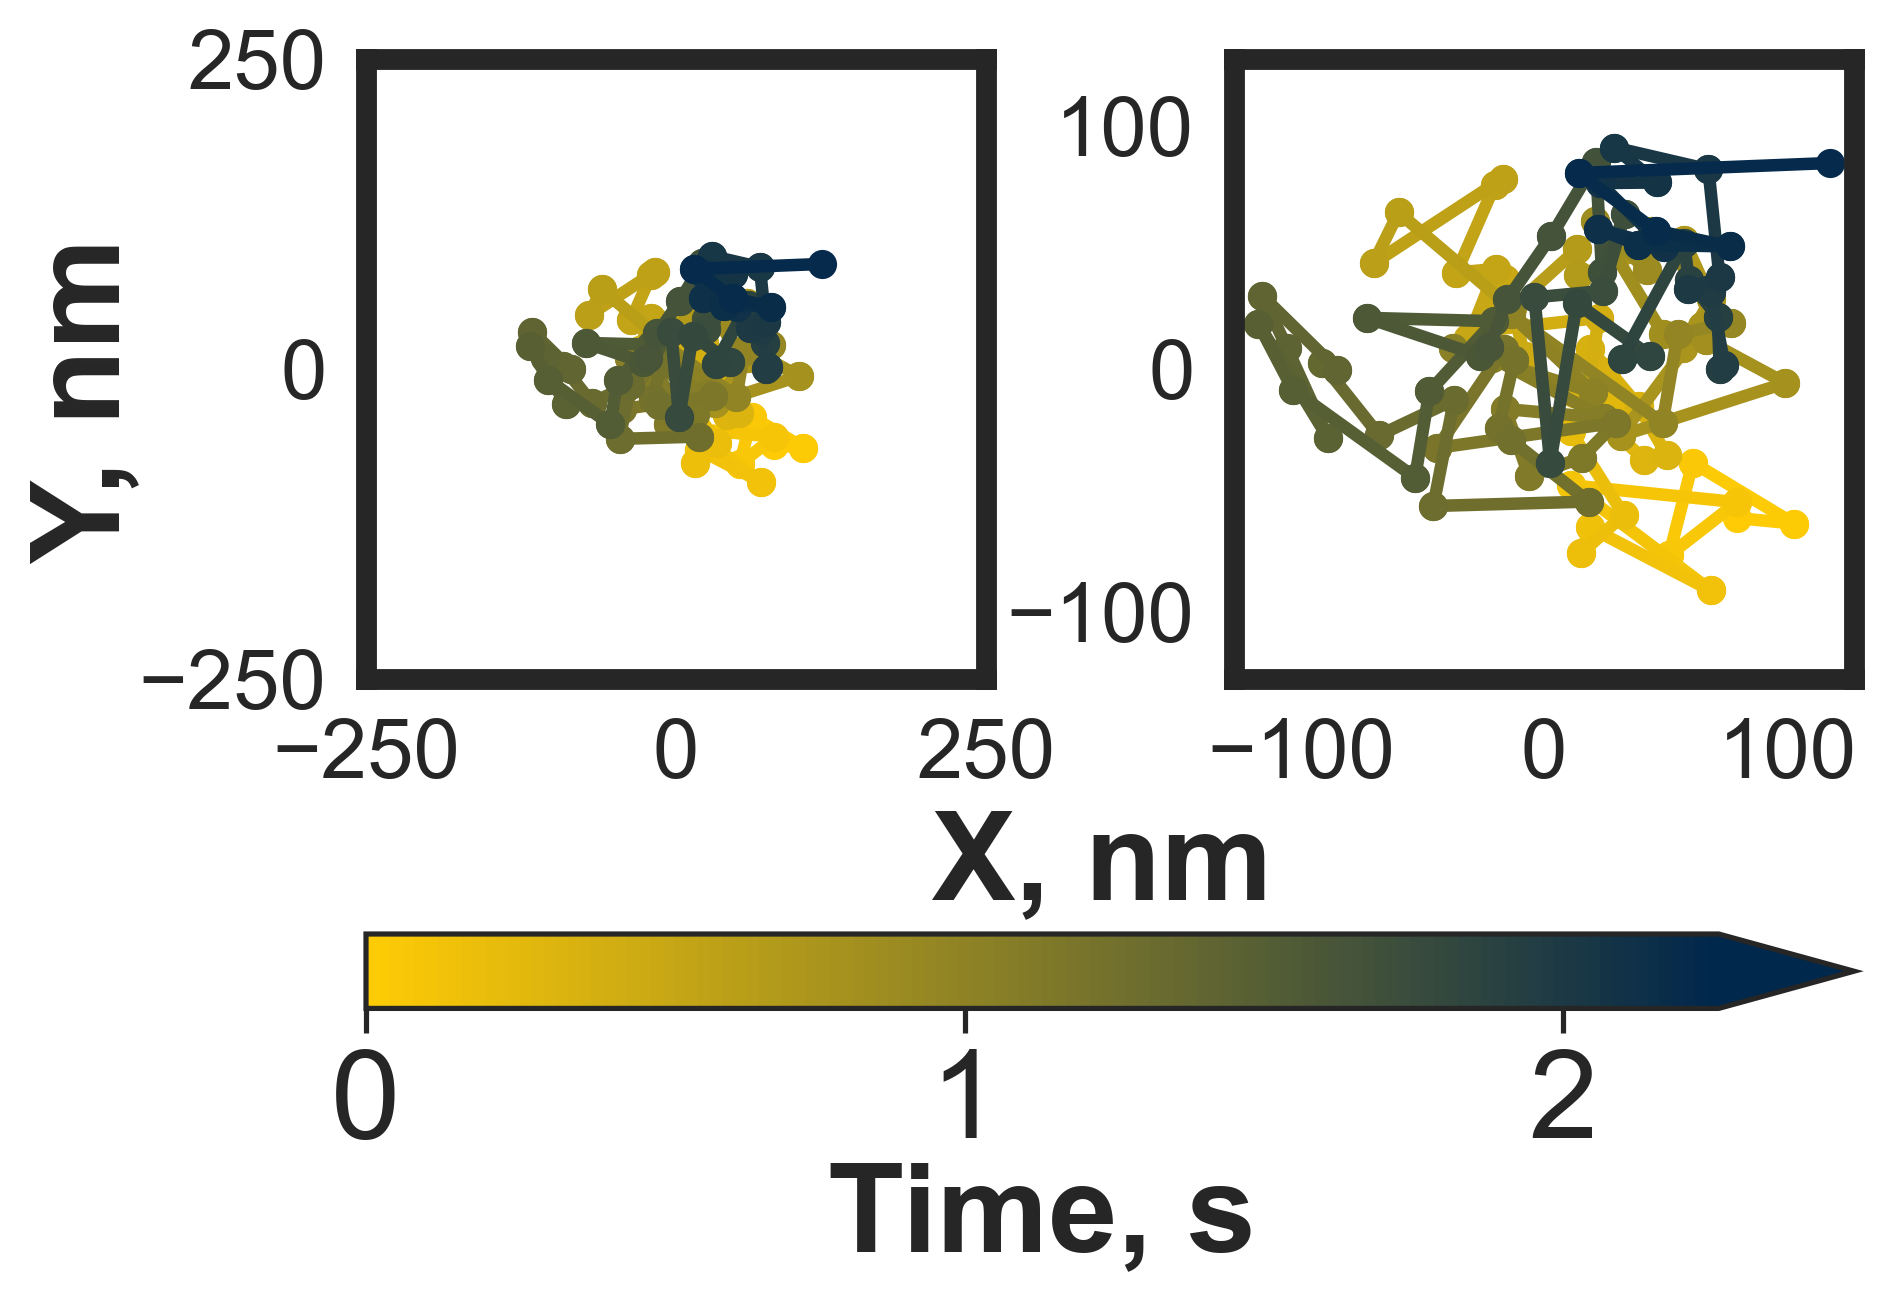

In [139]:
cmap = clr.LinearSegmentedColormap.from_list(
    cmap_name, [cmap_color_start, cmap_color_end], N=x.shape[0]
)

# Adjust track
x_plot = x[:-5]
y_plot = y[:-5]
t_plot = t[:-5]
x_plot = x_plot - (x_plot.min() + x_plot.max()) / 2
y_plot = y_plot - (y_plot.min() + y_plot.max()) / 2

# fig, axs = plt.subplots(1, 2, figsize=(10, 6), dpi=300)
fig = plt.figure(dpi=300)
gs = fig.add_gridspec(1, 2, wspace=0.4)
axs = gs.subplots()
for i in range(len(t_plot) - 1):
    axs[0].plot(
        x_plot[i : i + 2],
        y_plot[i : i + 2],
        "-o",
        color=cmap(i / len(t_plot)),
        linewidth=3,
    )
for i in range(len(t_plot) - 1):
    axs[1].plot(
        x_plot[i : i + 2],
        y_plot[i : i + 2],
        "-o",
        color=cmap(i / len(t_plot)),
        linewidth=3,
    )

# tick number and sizes
for i in range(2):
    axs[i].axis("scaled")
    axs[i].spines[:].set_linewidth(5)
    axs[i].tick_params(axis="both", which="major", labelsize=20)

xy_max = np.max([x_plot.max(), y_plot.max()]) + 10
axs[1].set_xlim(-xy_max, xy_max)
axs[1].set_ylim(-xy_max, xy_max)
axs[1].xaxis.set_major_locator(MaxNLocator(3))
axs[1].yaxis.set_major_locator(MaxNLocator(3))
xy_fix = 500
axs[0].set_xlim(-xy_fix / 2, xy_fix / 2)
axs[0].set_ylim(-xy_fix / 2, xy_fix / 2)
axs[0].set_xticks([-xy_fix / 2, 0, xy_fix / 2])
axs[0].set_yticks([-xy_fix / 2, 0, xy_fix / 2])


# color bar
cbar = plt.colorbar(
    cm.ScalarMappable(norm=clr.Normalize(t[0], t[-1]), cmap=cmap),
    ax=axs,
    orientation="horizontal",
    pad=0.23,
    drawedges=False,
    ticks=[0, 1, 2, 3],
    extendfrac=0.1,
    extend="max",
)
cbar.set_label(
    label="Time, s",
    weight="bold",
    fontsize=30,
    labelpad=0,
    family="Arial",
)
cbar.ax.tick_params(labelsize=30)

fig.text(0.42, 0.25, "X, nm", fontsize=30, weight="bold")
fig.text(-0.05, 0.5, "Y, nm", fontsize=30, weight="bold", rotation=90)


# saving
if switch_savefig:
    plt.savefig(
        fname_save_prefix + "-track-twoscales.png",
        format="png",
        dpi=300,
        bbox_inches="tight",
    )
plt.show()

## Plot MSD-tau

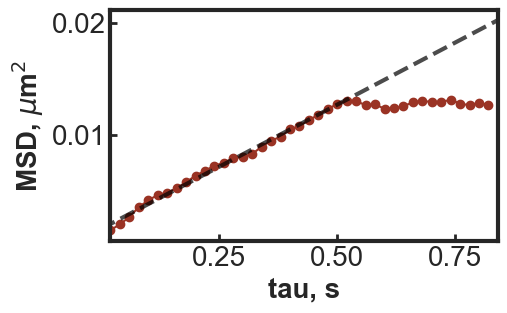

In [165]:
halflength = round(tau.shape[0] / 2)
plt.figure(figsize=(5, 3))

plt_ends_at_idx = halflength-15

plt.plot(
    tau[:plt_ends_at_idx],
    MSD[:plt_ends_at_idx],
    color=color,
    ls="-",
    marker="o",
)


def func(x, k, b):
    return k * x + b


popt, pcov = curve_fit(
    func,
    tau[:20],
    MSD[:20],
    # bounds=([0, 0], [np.inf, np.inf]),
)
k, b = popt
ref_x = np.linspace(0, tau[plt_ends_at_idx], 100)
plt.plot(
    ref_x,
    k * ref_x + b,
    color="black",
    ls="--",
    lw=3,
    alpha=0.7,
)
plt.xlim(tau[0], tau[plt_ends_at_idx])
plt.gca().spines[:].set_linewidth(3)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=20,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=2,
)
plt.gca().ticklabel_format(
    axis="y",
    style="scientific",
    scilimits=(-3, 3),
)
plt.gca().yaxis.get_offset_text().set_fontsize(20)
plt.gca().set_axisbelow(False)
plt.xlabel("tau, s", weight="bold", fontsize=20)
plt.ylabel(r"MSD, $\mu$m$^{2}$", weight="bold", fontsize=20)
if switch_savefig:
    plt.savefig(
        fname_save_prefix + "-MSDtau.png", format="png", dpi=300, bbox_inches="tight"
    )
plt.show()

## Angle Distribution

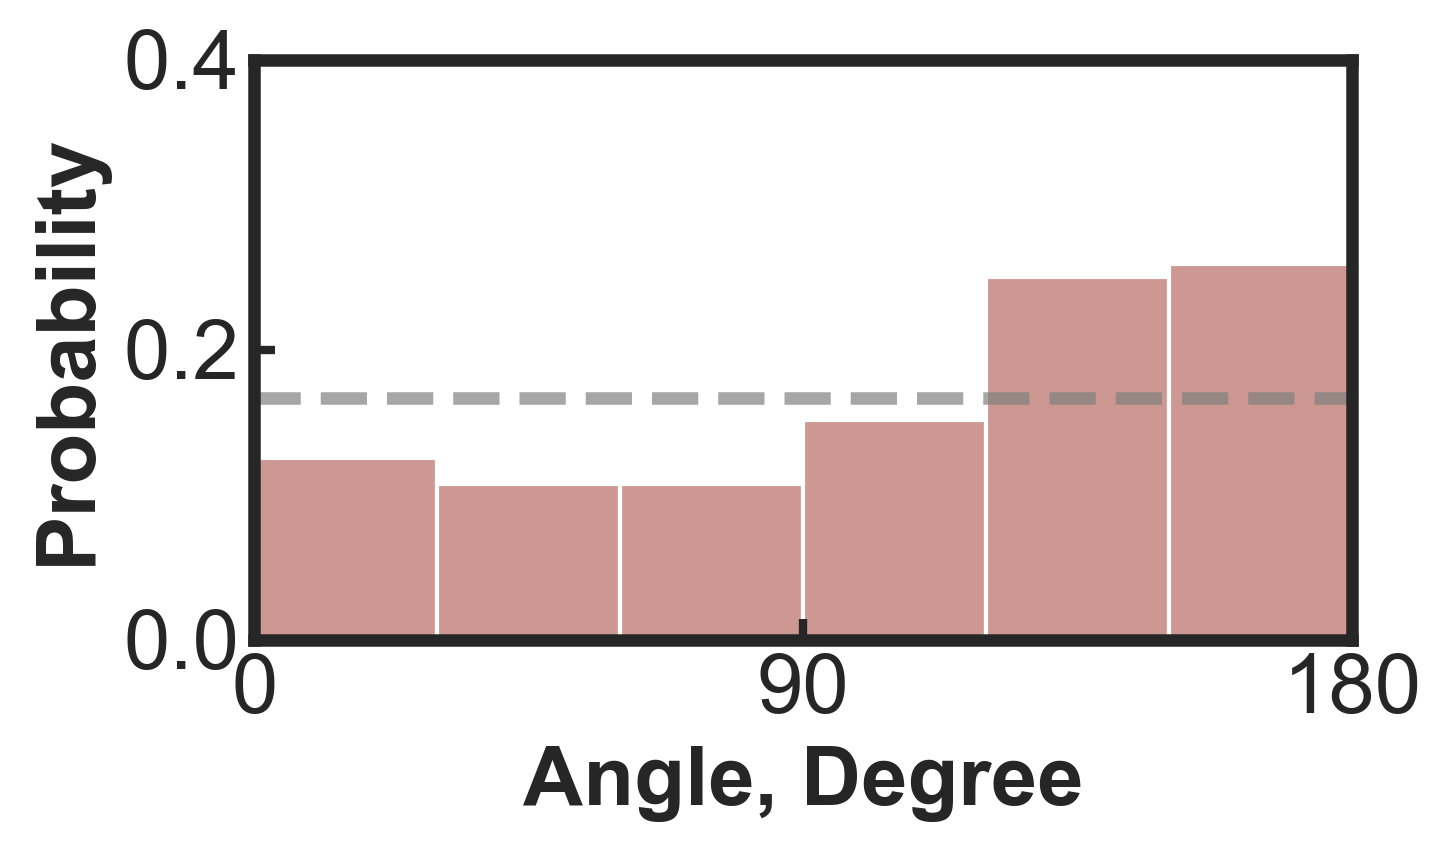

In [141]:
def calc_angle(x, y):
    # x and y at time 0 and time 1
    x0 = x[:-1]
    x1 = x[1:]
    y0 = y[:-1]
    y1 = y[1:]
    # unit vectors of all steps, and step 0 and step 1
    vector = np.array([x1 - x0, y1 - y0])
    # convert to complex number to use np.angle
    vector_complex = 1j * vector[1, :]
    vector_complex += vector[0, :]
    angles_eachstep = np.angle(vector_complex, deg=True)
    angles = np.ediff1d(angles_eachstep)  # between adjacent steps
    # convert all angles to within range (0,+-180) for output
    angles[angles < -180] = angles[angles < -180] + 360
    angles[angles > 180] = angles[angles > 180] - 360

    return angles


angles = calc_angle(x, y)
bins = 6
plt.figure(figsize=(5, 3), dpi=300)
sns.histplot(
    data=np.abs(angles),
    bins=bins,
    stat="probability",
    color=color,
    binrange=(0, 180),
    alpha=0.5,
)
plt.axhline(1 / bins, color="gray", ls="--", lw=3, alpha=0.7)
plt.gca().spines[:].set_linewidth(3)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=20,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=2,
)
plt.gca().ticklabel_format(
    axis="y",
    style="scientific",
    scilimits=(-2, 3),
)
plt.gca().yaxis.get_offset_text().set_fontsize(20)
plt.gca().set_axisbelow(False)
plt.xlabel("Angle, Degree", weight="bold", fontsize=20)
plt.ylabel("Probability", weight="bold", fontsize=20)
plt.xlim(0, 180)
plt.ylim(0, 0.4)
bins = np.linspace(0, 180, 3).astype(int)
plt.xticks(bins)
plt.tight_layout()
if switch_savefig:
    plt.savefig(
        fname_save_prefix + "-Angles.png", format="png", dpi=300, bbox_inches="tight"
    )
plt.show()

## Save data for replot

In [142]:
if not switch_read_from_file:
    value = np.concatenate([t, x, y, MSD, tau])
    variable = np.concatenate(
        [
            np.repeat("t_s", t.shape[0]),
            np.repeat("x_nm", x.shape[0]),
            np.repeat("y_nm", y.shape[0]),
            np.repeat("MSD_um2", MSD.shape[0]),
            np.repeat("tau_s", tau.shape[0]),
        ]
    )
    df_save = pd.DataFrame(
        {
            "variable": variable,
            "value": value,
        },
        dtype=object,
    )
    df_save.to_csv(fname_save_prefix + "-data.csv", index=False)